##  Import Libraries
Importing all the necessary Python libraries for data handling, visualization, and machine learning.


In [ ]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

## Importing the spam.csv dataset
 from the google drive into the notebook.

In [ ]:
!pip install gdown
import gdown

file_id = "1Uu9RwhrTFGAq_lAqQYNy9ok5i6DibrPA"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "spam.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Uu9RwhrTFGAq_lAqQYNy9ok5i6DibrPA
To: /content/spam.csv
100%|██████████| 504k/504k [00:00<00:00, 32.0MB/s]


'spam.csv'

##  Data Preprocessing
- Renaming columns to `text` and `label`
- Encoding target labels (`ham` as 0, `spam` as 1)
- Checking for missing values
- Checking for duplicate values


In [ ]:

# 2. Load Dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [ ]:
#checking for missing values
df.isnull().sum()

,0
label,0
text,0


In [ ]:
#checking for duplicate values
df.duplicated().sum()

np.int64(403)

It seems like there 403 duplicate values, and we will have to remove them.

In [ ]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

In [ ]:
# Encode labels
y = df['label'].map({'ham': 0, 'spam': 1})

X = df['text']

In [ ]:
y.value_counts()

,count
label,
0,4516
1,653


653 SMS are spam and rest 4516 SMS are ham.

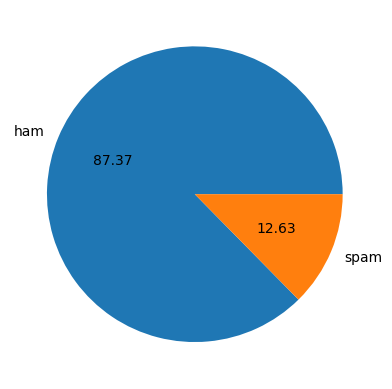

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Almost 88% are not spam and rest 12.6% are considered are spam.

**Data is imbalanced.**

##  Train-Test Split
Splitting the dataset into training and testing sets using an 80-20 ratio to prepare for model training and evaluation.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##  Train Base Models
Training several machine learning classifiers like Multinomial NB, Support Vector Classifier, etc

In [ ]:
# 5. DEFINE BASE MODELS
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Multinomial NB": MultinomialNB(),
    "Support Vector Classifier": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()

}

##  Model Evaluation Function
Evaluating each model using:
- Accuracy Score
- Precision Score
- Confusion Matrix
- Classification Report


In [ ]:
from sklearn.pipeline import Pipeline

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    precision_results = {}
    best_precision = 0
    best_model = None

    for name, model in models.items():
        print(f"\n{name} Results:")

        # If model is already a pipeline, don't wrap it again
        if isinstance(model, Pipeline):
            pipe = model
        else:
            pipe = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=5000)),
                ('model', model)
            ])

        # Fit and evaluate
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)

        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"Confusion Matrix: {name}")
        plt.show()

        results[name] = acc
        precision_results[name] = prec

        if prec > best_precision:
            best_precision = prec
            best_model = pipe

    return results, precision_results, best_model


## Passing the all the base models from above into this function


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       0.99      0.74      0.85       131

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.97      0.96      1034



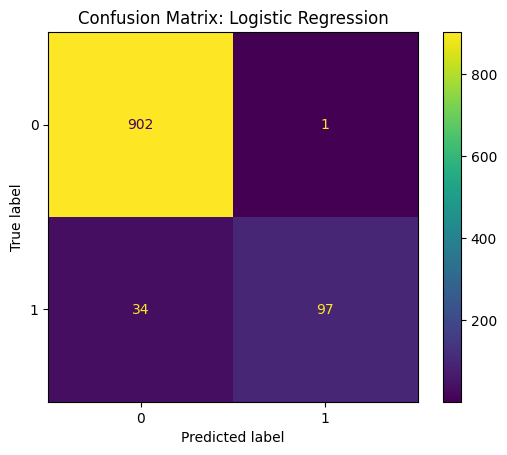


Ridge Classifier Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.98      0.85      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



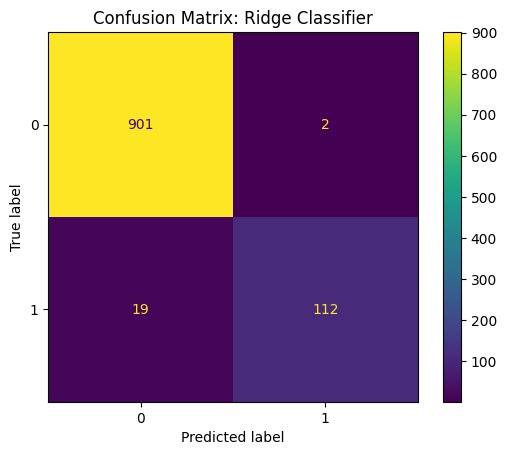


Multinomial NB Results:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       1.00      0.69      0.81       131

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.90      1034
weighted avg       0.96      0.96      0.96      1034



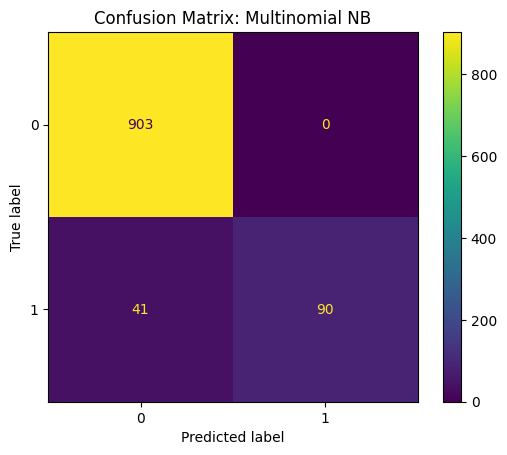


Support Vector Classifier Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



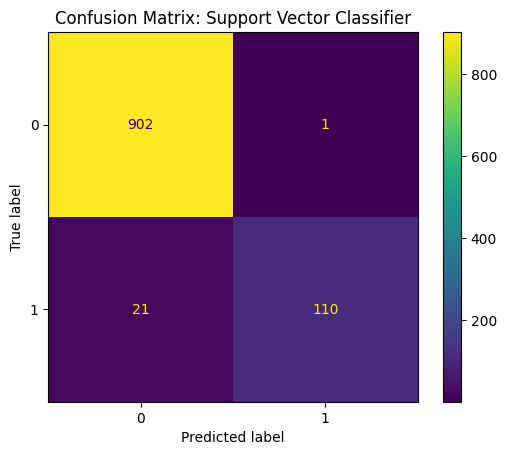


Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



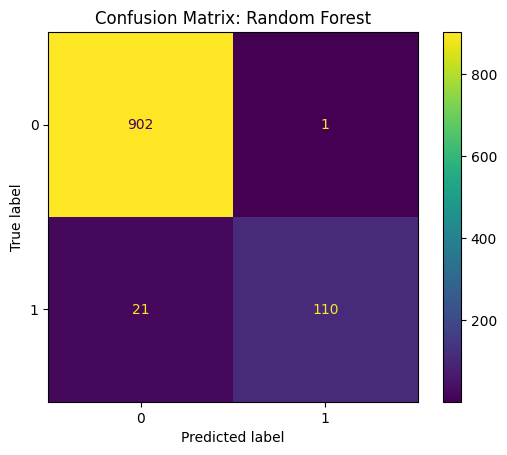


XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       0.98      0.80      0.88       131

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



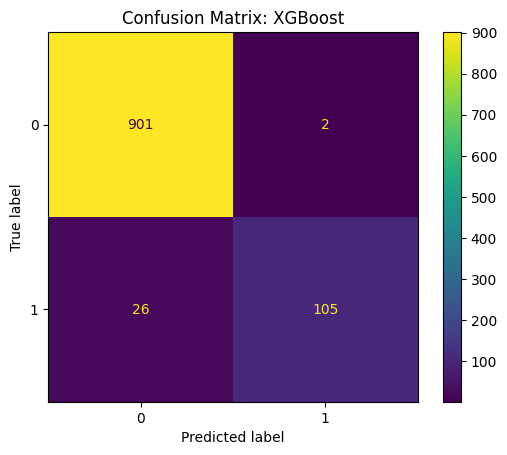


AdaBoost Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       903
           1       0.92      0.69      0.79       131

    accuracy                           0.95      1034
   macro avg       0.94      0.84      0.88      1034
weighted avg       0.95      0.95      0.95      1034



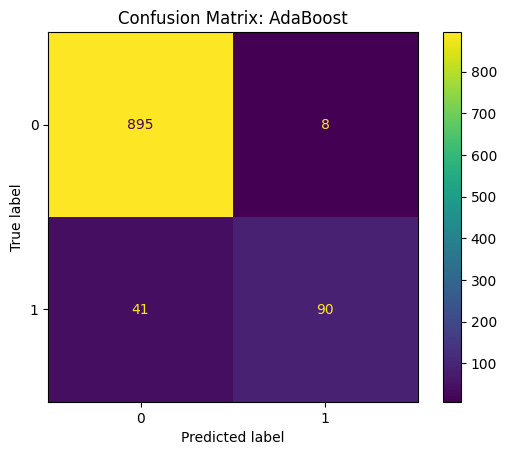


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.98      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.97      1034



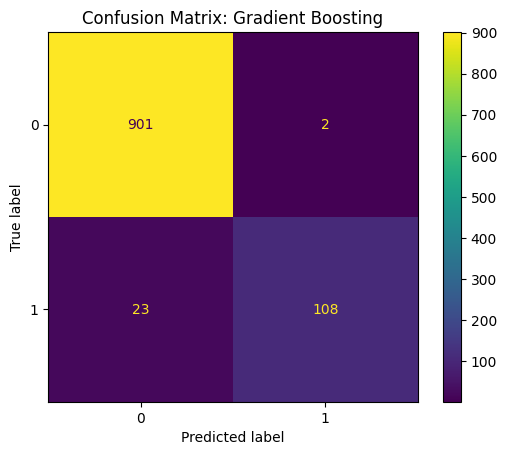

In [ ]:
# 7. TRAIN BASE MODELS
results, precision_results, best_model = train_and_evaluate(models, X_train, y_train, X_test, y_test)

##  Hyperparameter Tuning with GridSearchCV
Improving performance by tuning the parameters of:
- Random Forest
- XGBoost



Fitting 3 folds for each of 6 candidates, totalling 18 fits

Tuned Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.83      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



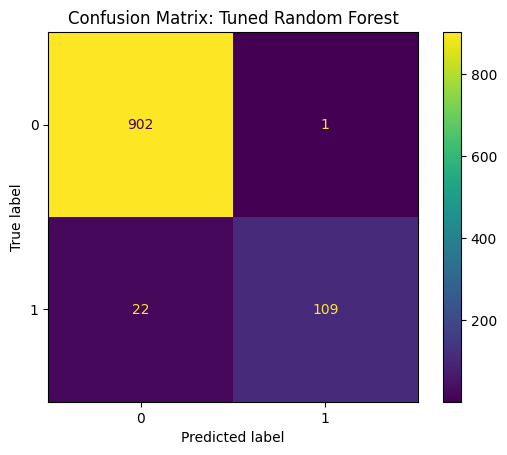

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Tuned XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       0.98      0.81      0.89       131

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



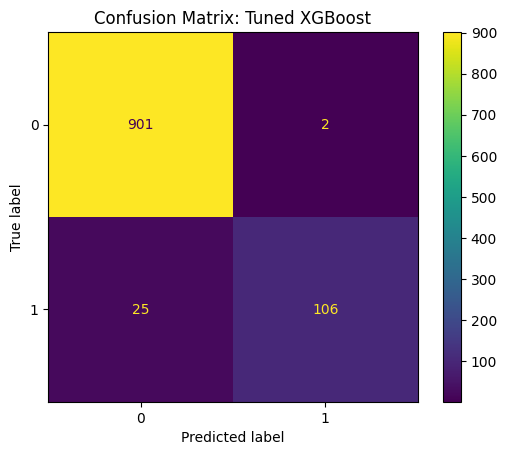

In [ ]:
# 9. HYPERPARAMETER TUNING EXAMPLES
# Random Forest
rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

rf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', RandomForestClassifier())
])

rf_grid = GridSearchCV(rf_pipe, rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)

print("\nTuned Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()

results['Random Forest (Tuned)'] = accuracy_score(y_test, y_pred_rf)
precision_results['Random Forest (Tuned)'] = precision_score(y_test, y_pred_rf)

# XGBoost
xgb_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6]
}

xgb_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)

print("\nTuned XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix: Tuned XGBoost")
plt.show()

results['XGBoost (Tuned)'] = accuracy_score(y_test, y_pred_xgb)
precision_results['XGBoost (Tuned)'] = precision_score(y_test, y_pred_xgb)

In [ ]:
print(rf_grid.best_estimator_)
print(xgb_grid.best_estimator_)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('model', RandomForestClassifier(n_estimators=200))])
Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=N

NOTE: The above pipeline already has Tfidf so we can't pass already vectorized data again through the Tfidf pipeline.
So we extract just the model from pipeline.

In [ ]:
# Extract just the model from pipeline
rf_model = rf_grid.best_estimator_.named_steps['model'] if isinstance(rf_grid.best_estimator_, Pipeline) else rf_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_.named_steps['model'] if isinstance(xgb_grid.best_estimator_, Pipeline) else xgb_grid.best_estimator_


#Creation of Stacking Classifier

- Here, we have taken the 3 models Random Forest, XGBoost and Support Vector Classifier in the Stacking Classifer and the final model taken was Logistic Regression.

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.97      0.89      0.93       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



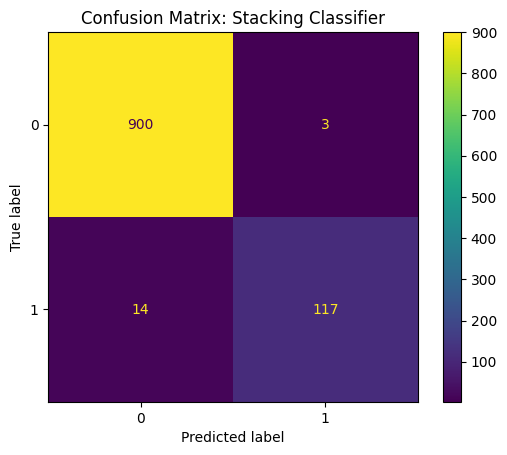

In [ ]:
# Final Logistic Regression with slight tuning
final_model = LogisticRegression(C=0.5, solver='liblinear')

# Stacking estimators
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('svc', SVC(probability=True))
]

# Stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_model,
    passthrough=False
)

# Stacking pipeline
stacking_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('stack', stacking_model)
])

# Fit the stacking pipeline
stacking_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_pipe.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# # Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Stacking Classifier")
plt.show()

results['Stacking Classifier'] = accuracy_score(y_test, y_pred_xgb)
precision_results['Stacking Classifier'] = precision_score(y_test, y_pred_xgb)




## Model comparision

In [ ]:
# Create a DataFrame from the results and precision results
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(precision_results.items(), columns=['Model', 'Precision'])

# Merge the two DataFrames on 'Model'
results_df = pd.merge(results_df, precision_df, on='Model')

# Sort by Accuracy
results_df = results_df.sort_values(by=['Precision','Accuracy'], ascending=False)

# Print the model comparison with both accuracy and precision
print("\nModel Comparison:")
print(results_df)



Model Comparison:
                        Model  Accuracy  Precision
2              Multinomial NB  0.960348   1.000000
3   Support Vector Classifier  0.978723   0.990991
4               Random Forest  0.978723   0.990991
8       Random Forest (Tuned)  0.977756   0.990909
0         Logistic Regression  0.966151   0.989796
1            Ridge Classifier  0.979691   0.982456
7           Gradient Boosting  0.975822   0.981818
9             XGBoost (Tuned)  0.973888   0.981481
10        Stacking Classifier  0.973888   0.981481
5                     XGBoost  0.972921   0.981308
6                    AdaBoost  0.952611   0.918367


# Saving the model.pkl and tfidf vectorizer.pkl

In [ ]:
# Save the tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save the best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [ ]:
def predict_new(text_list):
    # Load the saved model
    with open("best_model.pkl", "rb") as f:
        loaded_model = pickle.load(f)

    # Load the saved tfidf vectorizer
    with open("tfidf_vectorizer.pkl", "rb") as f:
        loaded_tfidf = pickle.load(f)

    # Transform the new text data using the loaded tfidf vectorizer
    text_list_tfidf = loaded_tfidf.transform(text_list)

    # Predict using the loaded model
    predictions = loaded_model.predict(text_list_tfidf)
    return predictions


#Bar graph showing the Accuracy and Precision score between varous models.

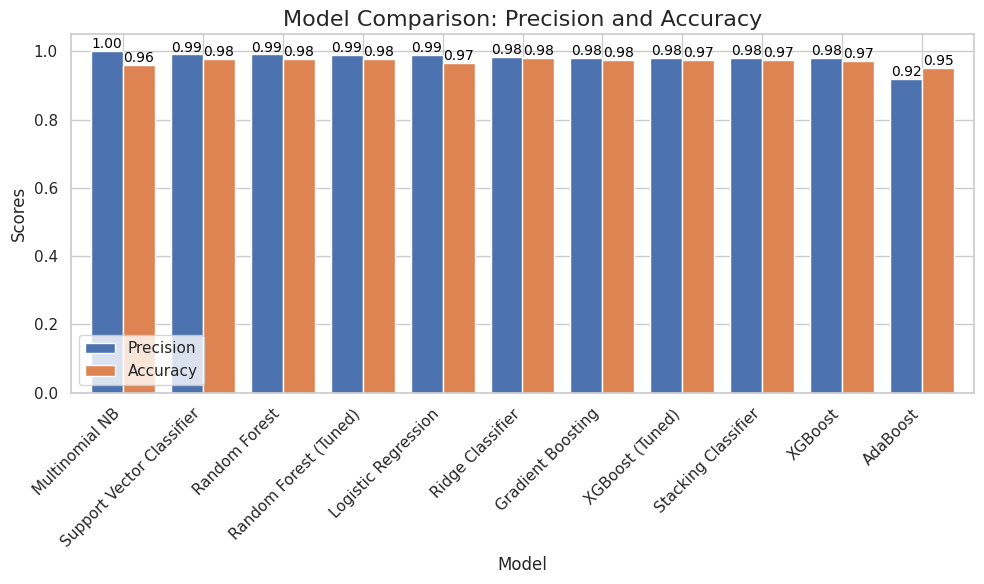

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot with precision and accuracy side by side for each model
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Precision', 'Accuracy']].plot(kind='bar', width=0.8, ax=plt.gca())

# Add title and labels
plt.title('Model Comparison: Precision and Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()
